In [118]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
ds = pd.read_csv("whole_sale.csv")
ds

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [55]:
ds.iloc[0][3:9].sum()

21443

In [168]:
X=ds[ds.columns[2:9]]

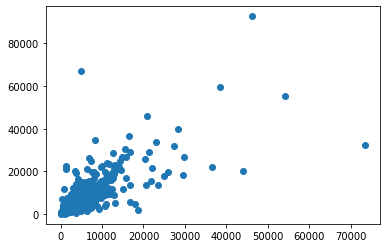

In [169]:
plt.scatter(ds.iloc[:,3],ds.iloc[:,4])

# KMeans 

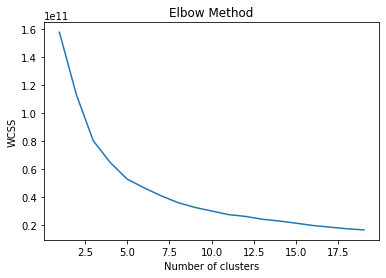

In [174]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
maxCluster = 20
for i in range(1,maxCluster):
    kmeans = KMeans(n_clusters=i,init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,maxCluster),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [205]:
# Fitting K-Means Clustering to teh dataset
kmeans = KMeans(n_clusters=3,init="k-means++", random_state=42)
y_predict  = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[35941.4       ,  6044.45      ,  6288.61666667,  6713.96666667,
         1039.66666667,  3049.46666667],
       [ 8253.46969697,  3824.6030303 ,  5280.45454545,  2572.66060606,
         1773.05757576,  1137.4969697 ],
       [ 8000.04      , 18511.42      , 27573.9       ,  1996.68      ,
        12407.36      ,  2252.02      ]])

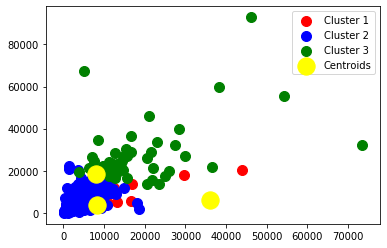

In [209]:
col1 =1
col2 =2
plt.scatter(X.iloc[y_predict == 0 , col1],X.iloc[y_predict == 0, col2], s=100 , c="red" , label = "Cluster 1")
plt.scatter(X.iloc[y_predict == 1 , col1],X.iloc[y_predict == 1, col2], s=100 , c="blue" , label = "Cluster 2")
plt.scatter(X.iloc[y_predict == 2 , col1],X.iloc[y_predict == 2, col2], s=100 , c="green" , label = "Cluster 3")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s =300 , c="yellow", label="Centroids")
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()

# Heirarchial

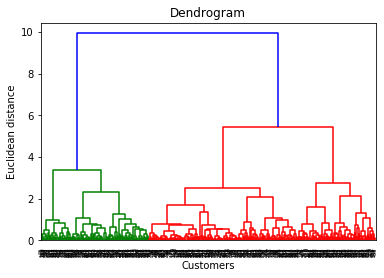

In [119]:
X=ds[ds.columns[2:9]]
X = preprocessing.normalize(X)
# using dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [121]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters= 3, affinity= 'euclidean', linkage= 'ward')
y_hc=hc.fit_predict(X)
y_hc

array([1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1,
       0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1,
       2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1,
       0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2,
       1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1,

<function matplotlib.pyplot.show(*args, **kw)>

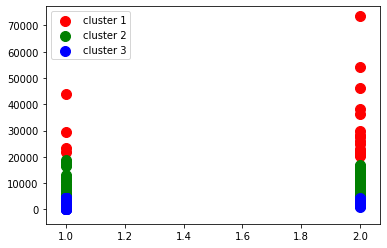

In [112]:
c1 = 0
c2= 2
plt.scatter(X.iloc[y_predict == 0,c1],X.iloc[y_predict == 0,c2], s = 100, c = 'red', label='cluster 1' )
plt.scatter(X.iloc[y_predict == 1,c1],X.iloc[y_predict == 1,c2], s = 100, c = 'green', label='cluster 2' )
plt.scatter(X.iloc[y_predict == 2,c1],X.iloc[y_predict == 2,c2], s = 100, c = 'blue', label='cluster 3' )
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

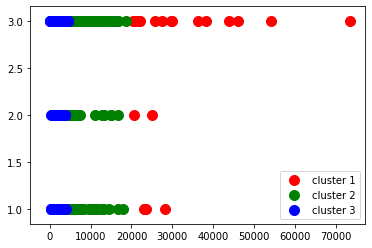

In [113]:
c1 = 2
c2= 1
plt.scatter(X.iloc[y_predict == 0,c1],X.iloc[y_predict == 0,c2], s = 100, c = 'red', label='cluster 1' )
plt.scatter(X.iloc[y_predict == 1,c1],X.iloc[y_predict == 1,c2], s = 100, c = 'green', label='cluster 2' )
plt.scatter(X.iloc[y_predict == 2,c1],X.iloc[y_predict == 2,c2], s = 100, c = 'blue', label='cluster 3' )
plt.legend()
plt.show

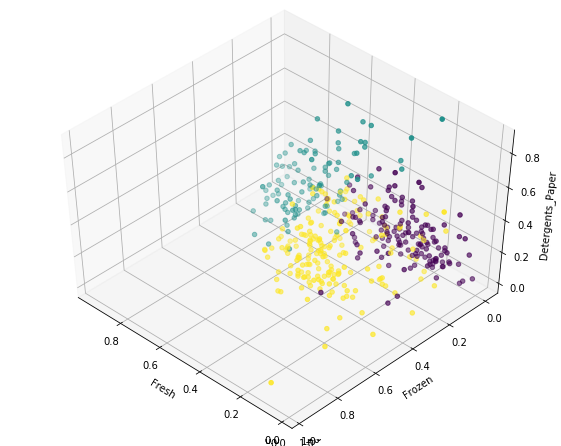

In [138]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
plt.cla()
ax.set_xlabel("Fresh")
ax.set_ylabel("")
ax.set_zlabel("")
#ax.scatter(normalised_X[:,2],normalised_X[:,3],normalised_X[:,4],c=y_hc.astype(Float))
for i in range (1,4):
    ax = Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
    plt.cla()
    ax.set_xlabel(ds.columns[2])
    ax.set_ylabel(ds.columns[2+i])
    ax.set_zlabel(ds.columns[3+i])
    ax.scatter(X[:,0],X[:,i],X[:,i+1],c=y_hc.astype(float))

## DBSCAN

In [140]:
from sklearn.cluster import DBSCAN

In [142]:
X=ds[ds.columns[2:9]]
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [145]:
data = X[["Grocery","Milk"]]
data =data.values.astype("float32",copy=False)
data

array([[7.5610e+03, 9.6560e+03],
       [9.5680e+03, 9.8100e+03],
       [7.6840e+03, 8.8080e+03],
       [4.2210e+03, 1.1960e+03],
       [7.1980e+03, 5.4100e+03],
       [5.1260e+03, 8.2590e+03],
       [6.9750e+03, 3.1990e+03],
       [9.4260e+03, 4.9560e+03],
       [6.1920e+03, 3.6480e+03],
       [1.8881e+04, 1.1093e+04],
       [1.2974e+04, 5.4030e+03],
       [4.5230e+03, 1.1240e+03],
       [1.1757e+04, 1.2319e+04],
       [1.4982e+04, 6.2080e+03],
       [1.2091e+04, 9.4650e+03],
       [3.8210e+03, 1.1140e+03],
       [1.2121e+04, 8.8160e+03],
       [2.9330e+03, 6.1570e+03],
       [1.0099e+04, 6.3270e+03],
       [9.4640e+03, 2.4950e+03],
       [4.6020e+03, 4.5190e+03],
       [2.0100e+03, 8.7100e+02],
       [4.4690e+03, 1.9170e+03],
       [2.2019e+04, 3.6423e+04],
       [1.3792e+04, 9.7760e+03],
       [7.5950e+03, 4.2300e+03],
       [2.8610e+03, 9.6100e+02],
       [3.0450e+03, 8.0300e+02],
       [2.5957e+04, 2.0484e+04],
       [2.6090e+03, 2.1000e+03],
       [1.

In [148]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
data = stscaler.fit_transform(data)

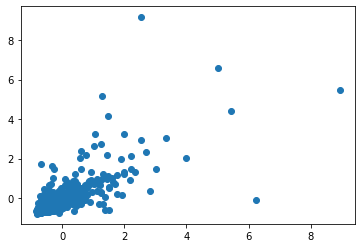

In [149]:
plt.scatter(data[:,0],data[:,1])

In [150]:
dbsc = DBSCAN(eps = 0.5, min_samples=15).fit(data)

In [154]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels,dtype=bool)
core_samples[dbsc.core_sample_indices_]=True

In [162]:
y_db= dbsc.fit_predict(data)

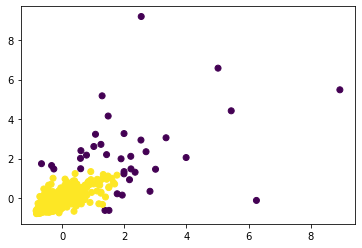

In [199]:
plt.scatter(data[:,0],data[:,1],c=labels)